# A. Preparar datos para el modelado (tratamiento, codificación, normalización).

##📌 1-Extracción

*texto en cursiva*##Fuente:
Data Set de Kaggle: Telco Customer Churn – https://www.kaggle.com/datasets/blastchar/telco-customer-churn
Archivo CSV: (/content/datos_tratados_TelecomX_Parte1.csv | Formato uniforme destino: DataFrame

In [ ]:
#Importar Librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#archivo = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta del archivo CSV .
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta donde se aloja el archivo CSV en GitHub.


df = pd.read_csv(URL_archivo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


\##🔧 2-Transformación y Limpieza de datos

In [ ]:
# Variables numericas en el archivo
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


No se necesita normalizar campos numericos

Diccionario de datos:

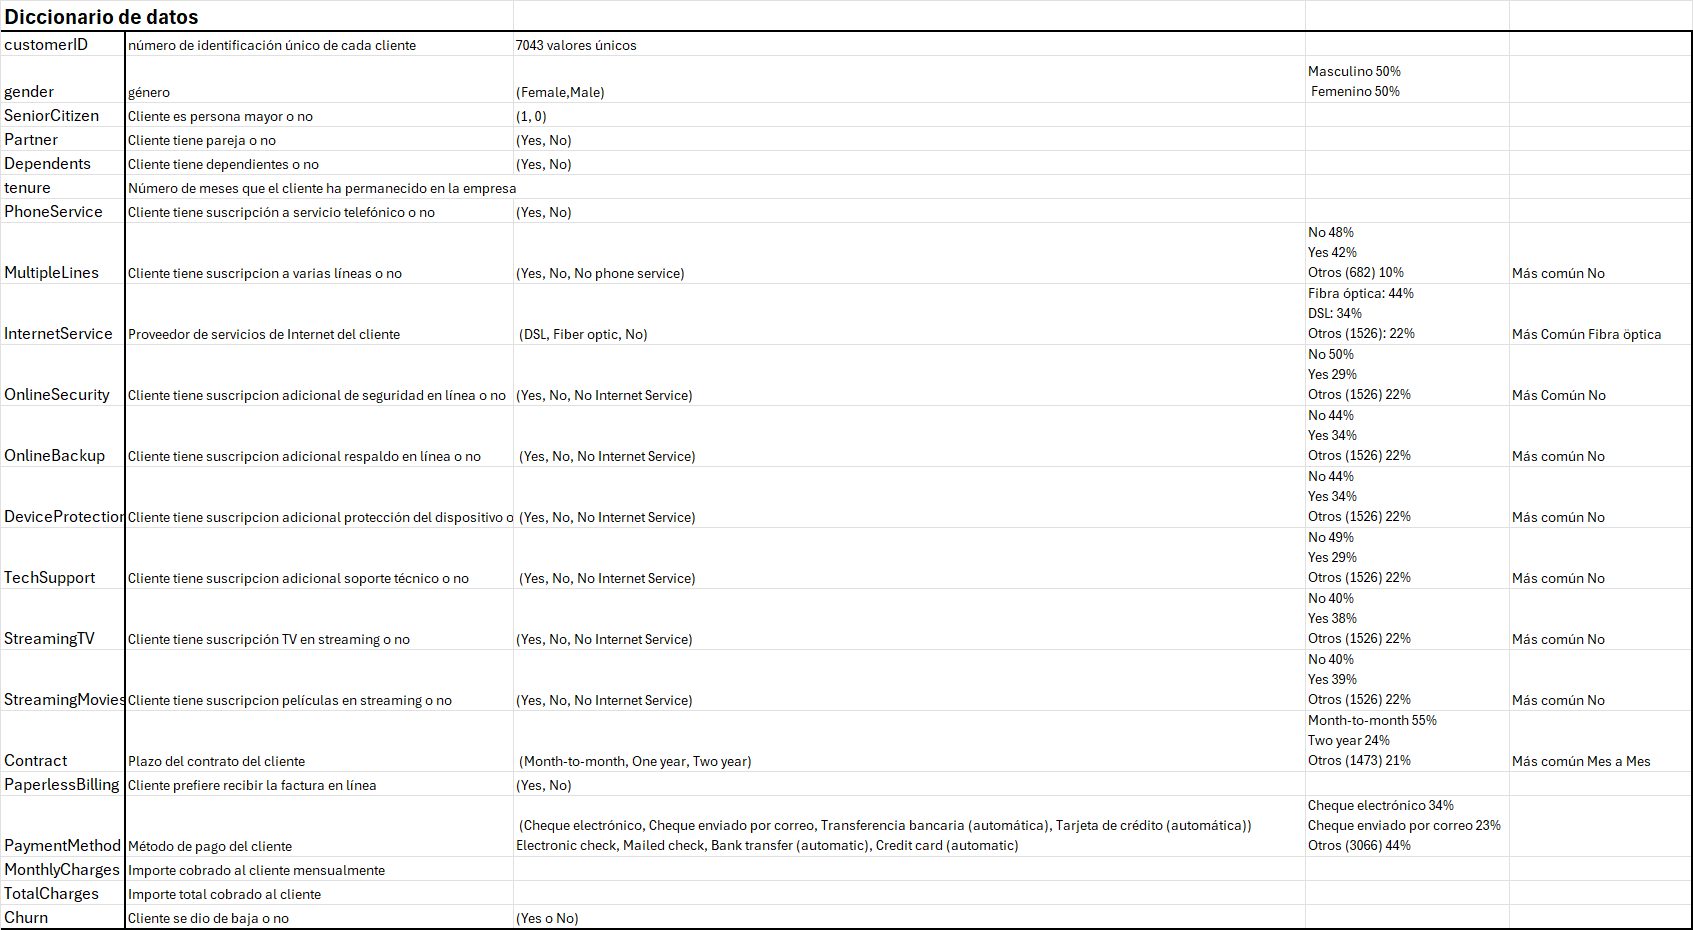

### 🧐 Validar

### 1.Valores unicos

In [ ]:
# Validar valores únicos por columna
for col in df.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df[col].nunique()}")
  if df[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7043
------------------------------------------------------------
Valores únicos columna 'gender': 2
gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'SeniorCitizen': 2
SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'Partner': 2
Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'Dependents': 2
Dependents: ['No' 'Yes']
------------------------------------------------------------
Valores únicos columna 'tenure': 73
------------------------------------------------------------
Valores únicos columna 'PhoneService': 2
PhoneService: ['No' 'Yes']
------------------------------------------------------------
Valores únicos columna 'MultipleLines': 3
MultipleLines: ['No phone service' 'No' 'Yes']
------------------------------------------------------------
Valores únicos columna 'Interne

### 2.Números duplicados

In [ ]:

# Validar si hay numeros duplicado
duplicados = df.duplicated()
print(duplicados.sum())


0


### 3.Valores nulos

In [ ]:
# Validar si hay valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [ ]:
# Validar si hay valores en blanco o vacios
valores_vacios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

Series([], dtype: int64)


In [ ]:
# 11 regisros en la columna TotalCharges
df[df['TotalCharges'].astype(str).str.strip()== '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


 * Campo account.Charges.Total valores con string vacio se asigna 0

In [ ]:
# Campo account TotalCharges : se asigna 0 porque es desconocido el valor de pago porque puede ser un cliente nuevo que no ha generado la primera factura de pago.
# Reemplazar las cadenas vacías en la columna 'TotalCharges' con 0
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip().replace('', '0')

In [ ]:
df[df['TotalCharges'].astype(str).str.strip()== '0']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


### 5.Tipos de datos

##### Campo TotalCharges de object a float

###6.Estandarizacion - Renombrar Columnas

In [ ]:
import numpy as np
# Convertir la columna TotalCharges a tipo float
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
display(df.dtypes)

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.rename(columns={
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Adulto_Mayor",
    "Partner": "Tiene_Pareja",
    "Dependents": "Tiene_Dependientes",
    "tenure": "Meses_Contrato",
    "PhoneService": "Suscripcion_Servicio_Telefono",
    "MultipleLines": "Suscripcion_Multiples_Lineas",
    "InternetService": "Suscripcion_Servicio_Internet",
    "OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "TechSupport": "Suscripcion_Soporte_Técnico",
    "StreamingTV": "Suscripcion_TV_Streaming",
    "StreamingMovies": "Suscripcion_Películas_Streaming",
    "Contract": "Tipo_Contrato",
    "PaperlessBilling": "Factura_Electronica",
    "PaymentMethod": "Metodo_Pago",
    "MonthlyCharges": "Factura_Mensual",
    "TotalCharges": "Cargos_Totales",
    "Churn": "Cancelacion",
}, inplace=True)

In [ ]:
df.dtypes

,0
ID_Cliente,object
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,object
Tiene_Dependientes,object
Meses_Contrato,int64
Suscripcion_Servicio_Telefono,object
Suscripcion_Multiples_Lineas,object
Suscripcion_Servicio_Internet,object
Suscripcion_Seguridad_En_Linea,object


### 🚧 7. Remover columnas irrelevantes

Excluir variables que:

- No tienen valor predictivo.
- Son redundantes con otras.
- Pueden causar fuga de datos.

In [ ]:
# ID Identificador de Cliente
df = df.drop(columns=['ID_Cliente'])

### 🚧 8. Agrupación de No y No service

    🎯 Objetivo

    Reducir *multicolinealidad* y simplificar los datos sin perder relevancia para el modelo predictivo.

    Varias variables de suscripcion, tenían tres categorías:

    "Yes" → cliente usa el servicio
    "No" → cliente tiene internet, pero no contrató el servicio
    "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

    Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

    Creaba correlación 1.0 entre variables
    Generaba VIF infinito
    Comprometía la estabilidad y el rendimiento de los modelos
    ✅ La solución: agrupar "No internet service" como "No"

    "Yes" = usa el servicio
    "No" = no usa el servicio (por cualquier motivo)

    Esto reduce la dimensionalidad y evita multicolinealidad.


In [ ]:
# creacion df copia para depurar datos
df_depurado = df.copy()

In [ ]:
# 1: Agrupar "No internet service" como "No"
columns_suscripcion = [
'Suscripcion_Seguridad_En_Linea',
'Suscripcion_Respaldo_En_Linea',
'Suscripcion_Proteccion_Dispositivo',
'Suscripcion_Soporte_Técnico',
'Suscripcion_TV_Streaming',
'Suscripcion_Películas_Streaming'
]


# Todas las suscripciones anteriores tienen los valores ['No' 'Yes' 'No internet service']
# No se incluye el campo 'Suscripcion_Multiples_Lineas' porque tiene estos valores y no se puede unificar el ultimo con No ['No' 'Yes' 'No phone service']

for col in columns_suscripcion:
    df_depurado[col] = df_depurado[col].replace('No internet service', 'No')

In [ ]:
# Verificación
for col in columns_suscripcion:
    print(f"{col}: {df_depurado[col].unique()}")
print(f"{'Suscripcion_Multiples_Lineas'}: {df_depurado['Suscripcion_Multiples_Lineas'].unique()}")

Suscripcion_Seguridad_En_Linea: ['No' 'Yes']
Suscripcion_Respaldo_En_Linea: ['Yes' 'No']
Suscripcion_Proteccion_Dispositivo: ['No' 'Yes']
Suscripcion_Soporte_Técnico: ['No' 'Yes']
Suscripcion_TV_Streaming: ['No' 'Yes']
Suscripcion_Películas_Streaming: ['No' 'Yes']
Suscripcion_Multiples_Lineas: ['No phone service' 'No' 'Yes']


In [ ]:
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Genero                              7043 non-null   object 
 1   Adulto_Mayor                        7043 non-null   int64  
 2   Tiene_Pareja                        7043 non-null   object 
 3   Tiene_Dependientes                  7043 non-null   object 
 4   Meses_Contrato                      7043 non-null   int64  
 5   Suscripcion_Servicio_Telefono       7043 non-null   object 
 6   Suscripcion_Multiples_Lineas        7043 non-null   object 
 7   Suscripcion_Servicio_Internet       7043 non-null   object 
 8   Suscripcion_Seguridad_En_Linea      7043 non-null   object 
 9   Suscripcion_Respaldo_En_Linea       7043 non-null   object 
 10  Suscripcion_Proteccion_Dispositivo  7043 non-null   object 
 11  Suscripcion_Soporte_Técnico         7043 no



### 🚧 9. One-hot encoding

In [ ]:
# 2: One-hot encoding (sin dummy trap)
# técnica de codificación que permite convertir datos categóricos en vectores numéricos aprovechables por los modelos de machine learning
columns_procesar = [
'Cancelacion',
'Genero',
'Tiene_Pareja',
'Tiene_Dependientes',
'Suscripcion_Servicio_Telefono',
'Suscripcion_Multiples_Lineas',
'Suscripcion_Servicio_Internet',
'Suscripcion_Seguridad_En_Linea',
'Suscripcion_Respaldo_En_Linea',
'Suscripcion_Proteccion_Dispositivo',
'Suscripcion_Soporte_Técnico',
'Suscripcion_TV_Streaming',
'Suscripcion_Películas_Streaming',
'Tipo_Contrato',
'Factura_Electronica',
'Metodo_Pago'
]

In [ ]:
# Verificación valores de estas columnas a procesar
for col in columns_procesar:
    print(f"{col}: {df_depurado[col].unique()}")

Cancelacion: ['No' 'Yes']
Genero: ['Female' 'Male']
Tiene_Pareja: ['Yes' 'No']
Tiene_Dependientes: ['No' 'Yes']
Suscripcion_Servicio_Telefono: ['No' 'Yes']
Suscripcion_Multiples_Lineas: ['No phone service' 'No' 'Yes']
Suscripcion_Servicio_Internet: ['DSL' 'Fiber optic' 'No']
Suscripcion_Seguridad_En_Linea: ['No' 'Yes']
Suscripcion_Respaldo_En_Linea: ['Yes' 'No']
Suscripcion_Proteccion_Dispositivo: ['No' 'Yes']
Suscripcion_Soporte_Técnico: ['No' 'Yes']
Suscripcion_TV_Streaming: ['No' 'Yes']
Suscripcion_Películas_Streaming: ['No' 'Yes']
Tipo_Contrato: ['Month-to-month' 'One year' 'Two year']
Factura_Electronica: ['Yes' 'No']
Metodo_Pago: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


###🚧 10. Variables Categoricas - object - aplicar codificación "one-hot"

In [ ]:
# Columnas Categoricas
columns_categoricas = df.select_dtypes(include='object').columns
print(f"Columnas categoricas:  {columns_categoricas}")

# Columnas Numericas
columns_numericas = [
  'Adulto_Mayor',
  'Tiene_Pareja',
  'Tiene_Dependientes',
  'Suscripcion_Servicio_Telefono',
  'Suscripcion_Multiples_Lineas',
  'Suscripcion_Seguridad_En_Linea',
  'Suscripcion_Respaldo_En_Linea',
  'Suscripcion_Proteccion_Dispositivo',
  'Suscripcion_Soporte_Técnico',
  'Suscripcion_TV_Streaming',
  'Suscripcion_Películas_Streaming',
  'Factura_Electronica'
]
print(f"\n Columnas númericas:  {columns_numericas}")




Columnas categoricas:  Index(['Genero', 'Tiene_Pareja', 'Tiene_Dependientes',
       'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas',
       'Suscripcion_Servicio_Internet', 'Suscripcion_Seguridad_En_Linea',
       'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo',
       'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming',
       'Suscripcion_Películas_Streaming', 'Tipo_Contrato',
       'Factura_Electronica', 'Metodo_Pago', 'Cancelacion'],
      dtype='object')

 Columnas númericas:  ['Cancelacion', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming', 'Suscripcion_Películas_Streaming', 'Factura_Electronica']


In [ ]:
# Estructura
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Adulto_Mayor                                   7043 non-null   int64  
 1   Meses_Contrato                                 7043 non-null   int64  
 2   Factura_Mensual                                7043 non-null   float64
 3   Cargos_Totales                                 7043 non-null   float64
 4   Genero_Male                                    7043 non-null   bool   
 5   Tiene_Pareja_Yes                               7043 non-null   bool   
 6   Tiene_Dependientes_Yes                         7043 non-null   bool   
 7   Suscripcion_Servicio_Telefono_Yes              7043 non-null   bool   
 8   Suscripcion_Multiples_Lineas_No phone service  7043 non-null   bool   
 9   Suscripcion_Multiples_Lineas_Yes               7043 

In [ ]:
# Numero columnas iniciales en el Data Frame
cantidad_columnas_iniciales = len(df_depurado.columns)

df_encoded = pd.get_dummies(df_depurado, columns=columns_categoricas, drop_first=True)

# Numero columnas despues de ejecutar la codificacion "one-hot"
cantidad_columnas_codificadas = len(df_encoded.columns)

In [ ]:
print(f" Q_Columnas_Iniciales: {cantidad_columnas_iniciales}")
print(f" Q_Columnas_Codificadas: {cantidad_columnas_codificadas}")
len(df_encoded.columns)

 Q_Columnas_Iniciales: 20
 Q_Columnas_Codificadas: 25


25

In [ ]:
# Estructura
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Adulto_Mayor                                   7043 non-null   int64  
 1   Meses_Contrato                                 7043 non-null   int64  
 2   Factura_Mensual                                7043 non-null   float64
 3   Cargos_Totales                                 7043 non-null   float64
 4   Genero_Male                                    7043 non-null   bool   
 5   Tiene_Pareja_Yes                               7043 non-null   bool   
 6   Tiene_Dependientes_Yes                         7043 non-null   bool   
 7   Suscripcion_Servicio_Telefono_Yes              7043 non-null   bool   
 8   Suscripcion_Multiples_Lineas_No phone service  7043 non-null   bool   
 9   Suscripcion_Multiples_Lineas_Yes               7043 

In [ ]:
df_encoded.dtypes

,0
Adulto_Mayor,int64
Meses_Contrato,int64
Factura_Mensual,float64
Cargos_Totales,float64
Genero_Male,bool
Tiene_Pareja_Yes,bool
Tiene_Dependientes_Yes,bool
Suscripcion_Servicio_Telefono_Yes,bool
Suscripcion_Multiples_Lineas_No phone service,bool
Suscripcion_Multiples_Lineas_Yes,bool


In [ ]:
# Validar valores únicos por columna
for col in df_encoded.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df_encoded[col].nunique()}")
  if df_encoded[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_encoded[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'Adulto_Mayor': 2
Adulto_Mayor: [0 1]
------------------------------------------------------------
Valores únicos columna 'Meses_Contrato': 73
------------------------------------------------------------
Valores únicos columna 'Factura_Mensual': 1585
------------------------------------------------------------
Valores únicos columna 'Cargos_Totales': 6531
------------------------------------------------------------
Valores únicos columna 'Genero_Male': 2
Genero_Male: [False  True]
------------------------------------------------------------
Valores únicos columna 'Tiene_Pareja_Yes': 2
Tiene_Pareja_Yes: [ True False]
------------------------------------------------------------
Valores únicos columna 'Tiene_Dependientes_Yes': 2
Tiene_Dependientes_Yes: [False  True]
------------------------------------------------------------
Valores únicos columna 'Suscripcion_Servicio_Telefono_Yes': 2
Suscripcion_Servicio_Telefono_Yes: [False  True]
-------------------------------

### 🚧 11.Verificación nuevamente de los valores nulos

In [ ]:
df_encoded.isnull().sum()

,0
Adulto_Mayor,0
Meses_Contrato,0
Factura_Mensual,0
Cargos_Totales,0
Genero_Male,0
Tiene_Pareja_Yes,0
Tiene_Dependientes_Yes,0
Suscripcion_Servicio_Telefono_Yes,0
Suscripcion_Multiples_Lineas_No phone service,0
Suscripcion_Multiples_Lineas_Yes,0


In [ ]:
# Verifica valores nulos en las dos columnas
#print(df_encoded[['Cuentas_diarias', 'Cargos_Totales']].isnull().sum())

##  📌 2.Análisis Exploratorio de datos (EDA)

Analisis descriptivo

Datos numéricos

In [ ]:
df_depurado.describe()

,Adulto_Mayor,Meses_Contrato,Factura_Mensual,Cargos_Totales
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Datos texto

In [ ]:
datos_texto=df_depurado[['Genero','Suscripcion_Servicio_Internet','Tipo_Contrato','Metodo_Pago']]
datos_texto.head(3)

,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
0,Female,DSL,Month-to-month,Electronic check
1,Male,DSL,One year,Mailed check
2,Male,DSL,Month-to-month,Mailed check


#### Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
cancelacion_general = df['Cancelacion'].value_counts()
cancelacion_general_porcentaje = df['Cancelacion'].value_counts(normalize=True) * 100
tasa_cancelacion_general = pd.concat([cancelacion_general, cancelacion_general_porcentaje], axis=1)
tasa_cancelacion_general.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']
display(tasa_cancelacion_general)

NameError: name 'df' is not defined

In [ ]:

import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df, x='Cancelacion', nbins=3, title='Histograma Cancelacion', text_auto=True,
                   color='Cancelacion',
                   color_discrete_map={0: 'blue', 1: 'red', -1: 'gray'}) # Assign colors: 0 (No) to blue, 1 (Yes) to red, -1 (Unknown) to gray
fig.update_layout(title=dict(text='Histograma Cancelacion', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'Activos', 'De Baja'])

# Update legend labels
fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Activos').replace('1', 'De Baja').replace("-1", 'No definidos')))

fig.show()

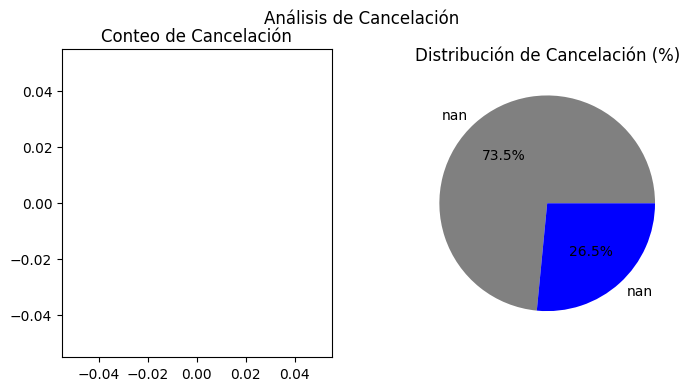

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas
import plotly.express as px

# Get the counts of each cancellation category
cancelacion_counts = df_depurado['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Map numerical values to text labels for plotting
cancellation_labels = { 0: 'Activos', 1: 'De Baja'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_labels)


# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Add a general title for the subplots
fig.suptitle('Análisis de Cancelación')

# Add the bar chart for cancellation counts to the first subplot
# Sort by the numerical value to ensure consistent order
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')
axs[0].bar(cancelacion_counts['Cancelacion_Text'], cancelacion_counts['Count'], color=['gray', 'blue', 'red']) # Use appropriate colors
axs[0].set_title('Conteo de Cancelación') # Changed title to reflect bar chart of counts



# Add a pie chart for cancellation distribution to the second subplot
axs[1].pie(cancelacion_counts['Count'], labels=cancelacion_counts['Cancelacion_Text'], autopct='%1.1f%%', colors=['gray', 'blue', 'red']) # Use counts and labels for pie chart
axs[1].set_title('Distribución de Cancelación (%)') # Changed title for clarity

# Remove axis labels that don't apply to these charts
# for ax in axs.flat:
#     ax.set_xlabel('Mes')
#     ax.set_ylabel('Número de ventas')

# Show the figure
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


# Generate data for the bar chart (counts of cancellation)
cancelacion_counts = df_depurado['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Map numerical values to text labels for plotting
cancellation_map = {0: 'Activos', 1: 'De Baja',-1: 'No definidos'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_map)

# Define colors for each category
colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}

# Sort by the numerical value to ensure consistent order for plotting and colors
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')

# Add bar traces for each cancellation category to the first subplot
for status, text_status in cancellation_map.items():
    # Before filtering, ensure 'Cancelacion' column is mapped to numerical values if it contains strings
    # We need to ensure 'status' is numerical (0, 1, -1) for comparison, so we map the column first
    # If 'Cancelacion' is already numerical (0,1), this map will not change it.
    mapped_cancelacion = cancelacion_counts['Cancelacion'].map({'No': 0, 'Yes': 1, '': -1}).fillna(cancelacion_counts['Cancelacion'])
    subset = cancelacion_counts[mapped_cancelacion == status]

    if not subset.empty:
        fig_subplots.add_trace(go.Bar(x=[subset['Cancelacion_Text'].iloc[0]], y=[subset['Count'].iloc[0]], # Use list for x and y to plot single bar
                                     text=[subset['Count'].iloc[0]], textposition='auto',
                                     marker_color=colors[text_status], # Set color
                                     name=text_status, # Set legend name for each category
                                     showlegend=True, legendgroup='group1'), # Show legend and assign legend group
                              row=1, col=1)


# Prepare data for the pie chart (Overall Churn Percentage)
# Force recalculation of overall_churn_rate with numerical indices
temp_cancelacion_numeric = df_depurado['Cancelacion'].map({'No': 0, 'Yes': 1, '': -1})
overall_churn_rate = temp_cancelacion_numeric.value_counts(normalize=True) * 100

# Sort overall_churn_rate by index to ensure consistent color mapping
overall_churn_rate_sorted = overall_churn_rate.sort_index()

labels = overall_churn_rate_sorted.index.map({0: 'Activos', 1: 'De Baja', -1: 'No definidos'}).tolist()
values = overall_churn_rate_sorted.values.tolist()

# Define colors for the pie chart slices based on the sorted index values
# Mapping: -1 (Desconocida) -> gray, 0 (No Cancelacion) -> blue, 1 (Cancelacion) -> red
pie_colors_map = {-1: 'gray', 0: 'blue', 1: 'red'}
pie_colors = [pie_colors_map[i] for i in overall_churn_rate_sorted.index]


# Add pie chart trace to the second subplot
fig_subplots.add_trace(go.Pie(labels=labels, values=values, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors), # Set colors for pie slices
                              showlegend=True, legendgroup='group2'), # Show legend and assign legend group
                       row=1, col=2)

# Update layout (main title and legend)
fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='Análisis de Cancelación', font=dict(size=18), x=0.5, xanchor='center'), # Center the main title
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle')) # Position legend at the exact center

# Show the combined figure
fig_subplots.show()

# Export the figure
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

KeyError: 'No'

## ⛳ 3. Normalización / Estandarización

La normalización de datos es un paso común en el preprocesamiento, especialmente importante para algoritmos que son sensibles a la escala de los atributos, como:


- Regresión Logística
- Máquinas de Vectores de Soporte (SVM)
- Redes Neuronales
- K-Vecinos Más Cercanos (KNN)

Sin embargo, modelos basados en árboles (como Decision Tree, Random Forest y XGBoost) no requieren normalización.

En este proyecto, aplicaremos la normalización Min-Max, que transforma los valores al rango [0, 1]. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo de Regresión Logística que utilizaremos. Aunque Random Forest no lo requiere, normalizamos los datos para mantener la consistencia en la preparación de los conjuntos de entrenamiento y prueba.

In [ ]:
# Validar proporción en la columna Cancelacion_1 = Churn_yes
df_encoded['Cancelacion_1'].value_counts(normalize = True)

# Se observa que clientes Cancelados = 73% y Activos = 26%, No es adecuado porque debe haber una relación minima de 40% en uno de los dos valores, si se deja asi, se inclina la balanza a los registros False osea los Cancelados.
# Se observa proporción Inadecuada


,proportion
Cancelacion_1,
False,0.73463
True,0.26537


In [ ]:
# Normalizar/Estandarizar columnas numéricas utilizando Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

,Meses_Contrato,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Numero_Servicios,Genero_Male,Suscripcion_Servicio_Internet_Fiber optic,Suscripcion_Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,...,Suscripcion_Servicio_Telefono_1,Suscripcion_Multiples_Lineas_0,Suscripcion_Multiples_Lineas_1,Suscripcion_Seguridad_En_Linea_1,Suscripcion_Respaldo_En_Linea_1,Suscripcion_Proteccion_Dispositivo_1,Suscripcion_Soporte_Técnico_1,Suscripcion_TV_Streaming_1,Suscripcion_Películas_Streaming_1,Factura_Electronica_1
0,0.125000,0.471144,0.068315,0.470588,0.500,False,False,False,True,False,...,True,True,False,False,True,False,True,True,False,True
1,0.125000,0.414428,0.062454,0.411765,0.375,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
2,0.055556,0.553731,0.032338,0.558824,0.250,True,True,False,False,False,...,True,True,False,False,False,True,False,False,False,True
3,0.180556,0.793532,0.142531,0.794118,0.625,True,True,False,False,False,...,True,True,False,False,True,True,False,True,True,True
4,0.041667,0.653234,0.030789,0.647059,0.375,False,True,False,False,False,...,True,True,False,False,False,False,True,True,False,True


In [ ]:
# Display the first few rows to verify the column has been removed
display(df_encoded.head())

,Meses_Contrato,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Numero_Servicios,Genero_Male,Suscripcion_Servicio_Internet_Fiber optic,Suscripcion_Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,...,Suscripcion_Servicio_Telefono_1,Suscripcion_Multiples_Lineas_0,Suscripcion_Multiples_Lineas_1,Suscripcion_Seguridad_En_Linea_1,Suscripcion_Respaldo_En_Linea_1,Suscripcion_Proteccion_Dispositivo_1,Suscripcion_Soporte_Técnico_1,Suscripcion_TV_Streaming_1,Suscripcion_Películas_Streaming_1,Factura_Electronica_1
0,0.125000,0.471144,0.068315,0.470588,0.500,False,False,False,True,False,...,True,True,False,False,True,False,True,True,False,True
1,0.125000,0.414428,0.062454,0.411765,0.375,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
2,0.055556,0.553731,0.032338,0.558824,0.250,True,True,False,False,False,...,True,True,False,False,False,True,False,False,False,True
3,0.180556,0.793532,0.142531,0.794118,0.625,True,True,False,False,False,...,True,True,False,False,True,True,False,True,True,True
4,0.041667,0.653234,0.030789,0.647059,0.375,False,True,False,False,False,...,True,True,False,False,False,False,True,True,False,True


# B. Análisis de correlación y selección de variables.

¿Cuáles factores están relacionados con el churn_yes = cancelacion? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

- 1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- 0: no hay relación lineal entre las variables.
- 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

## 🔍 3-Correlación entre variables

In [ ]:
corr = df_encoded.corr()

In [ ]:
corr['Cancelacion_1']

,Cancelacion_1
Meses_Contrato,-0.352229
Factura_Mensual,0.193356
Cargos_Totales,-0.198324
Cuentas_diarias,0.192303
Numero_Servicios,-0.067264
Genero_Male,-0.008612
Suscripcion_Servicio_Internet_Fiber optic,0.308020
Suscripcion_Servicio_Internet_No,-0.227890
Tipo_Contrato_One year,-0.177820
Tipo_Contrato_Two year,-0.302253


Aqui se observa que es interesante analizar la mayor correlacion en las variables

¿Qué factores están más correlacionados?

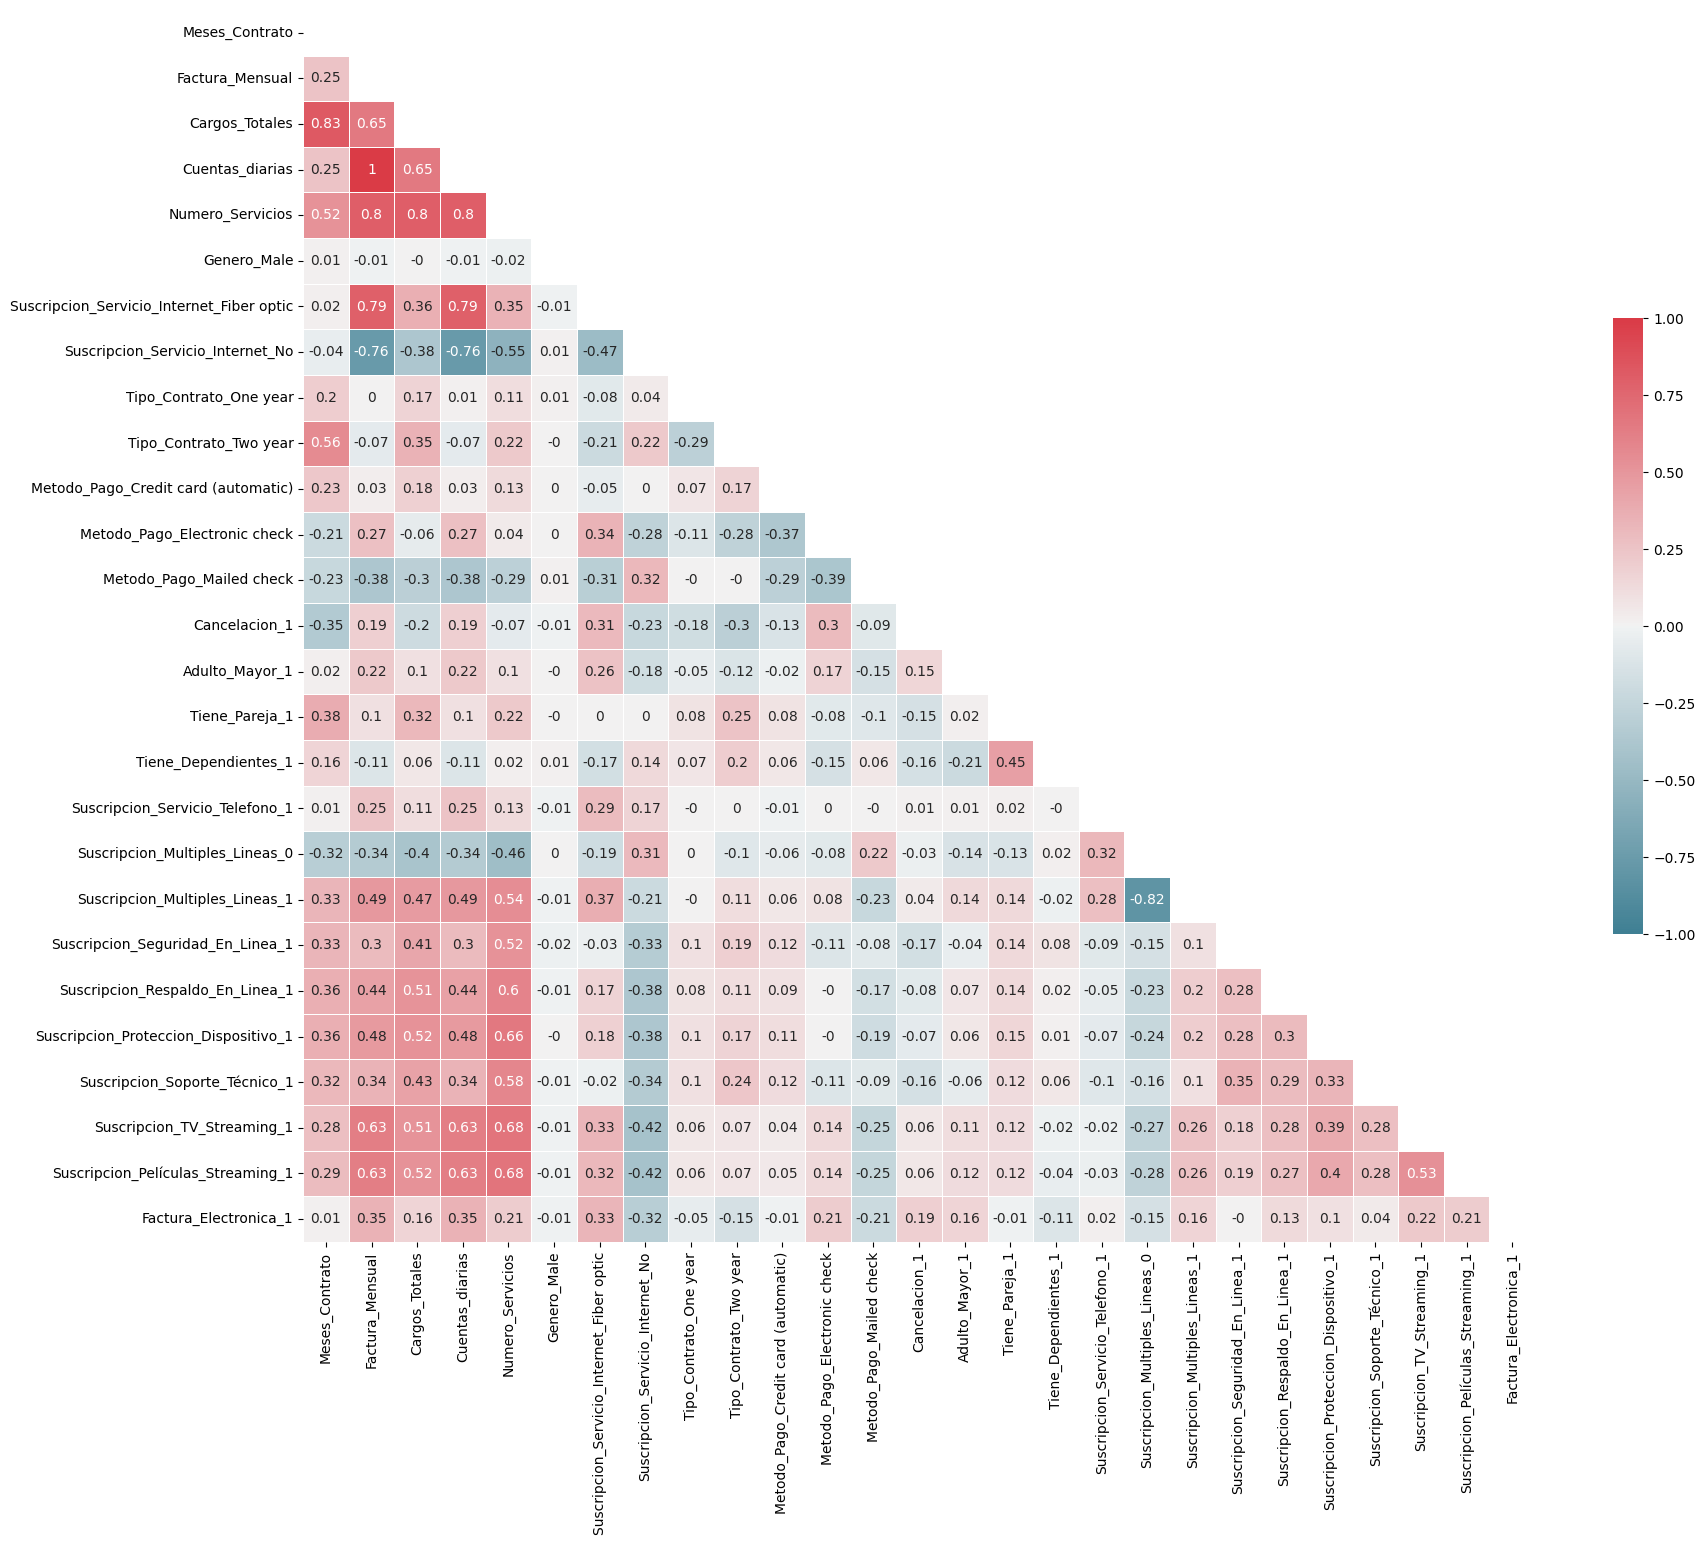

In [ ]:
# Mapa de calor para ver las correlaciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(20,16))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(np.round(corr, 2), mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Genera muchos datos dificiles de interpetar y analizar, tiene muchos valores, columnas. Esta no es la manera mas sencilla de interpetar.

Entonces se aplica una mascara se filtra, usando una tasa para tener una correlacion mas cercana a nuestra variable churn_yes en mi caso Cancelacion_1.

Nota: Se pueden reordenar columnas de df, dejar al final la variable de respuesta al final, para que sea mas legible.

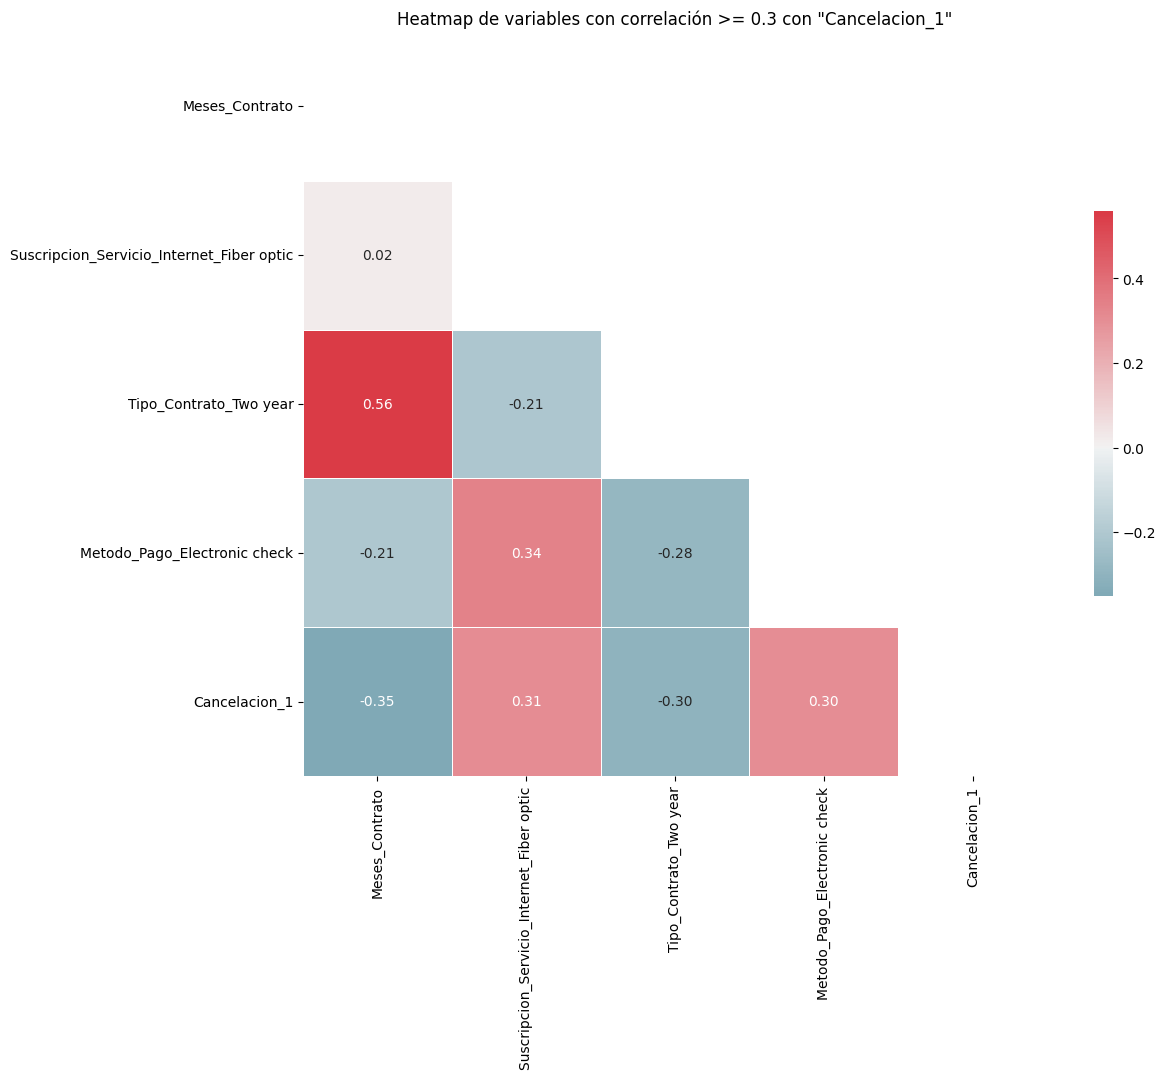

In [ ]:
# Mapa de calor para ver las correlaciones mas cercanas a la variable Cancleacion_1 = Churn_Yes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Cancelacion_1'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.3  #0.07  # 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

### Interpretación de la Correlación con la Variable Objetivo (`Cancelacion_1`)

Para identificar los factores más relevantes que influyen en la cancelación (`Cancelacion_1`), analizamos los coeficientes de correlación de Pearson entre cada variable y la variable objetivo.

Nos centramos en las variables con un **valor absoluto de correlación** superior a un umbral determinado (por ejemplo, >= 0.30 o >= 0.07, como usamos en el heatmap filtrado). Esto nos ayuda a identificar las variables con una relación lineal más fuerte con la cancelación, ya sea positiva o negativa.

*   **Correlación Positiva (coeficiente > 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación también tiende a aumentar.
*   **Correlación Negativa (coeficiente < 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación tiende a disminuir (o a medida que disminuye, la probabilidad de cancelación aumenta).

Las variables con coeficientes de correlación (en valor absoluto) más altos son candidatas clave para ser incluidas en los modelos predictivos, ya que tienen un impacto más significativo en la variable objetivo.

Al ver los coeficientes de correlación de cada variable con la Cancelacion_1, vamos a identificar las variables con un coeficiente de correlación cuyo valor absoluto es mayor o igual a 0.30 y explicar qué podemos inferir de ellas.

Aquí están las variables que cumplen ese criterio en los datos y su posible interpretación:

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.3** (o ≤ -0.3) con la variable objetivo `Cancelacion_1=Churn_Yes`.

---

🔍 **Correlación con `Cancelacion_1=Churn_Yes` (variable objetivo)**

| Variable                                    | Tipo Correlación con Churn\_Yes | Interpretación (Inferencia)                                                                                                               |
| ------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| `Suscripcion_Servicio_Internet_Fiber optic` | **+0.31** Positiva (moderada)   | Los clientes con Fibra Óptica tienen una mayor probabilidad de cancelar. Puede estar relacionado al costo o a la competitividad.          |
| `Metodo_Pago_Electronic check`              | **+0.30** Positiva (moderada)   | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado o problemas en el proceso.        |
| `Tipo_Contrato_Two year`                    | **-0.30** Negativa (moderada)   | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios).                                                       |
| `Meses_Contrato`                            | **-0.35** Negativa (moderada a fuerte) | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado.                                                          |
| `Suscripcion_Servicio_Internet_No`          | **-0.23** Negativa (baja)       | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales).                |

Variables que se acercan al umbral de 0.30 y que también son relevantes:

Aunque están justo por debajo del 0.30 absoluto, variables como Factura_Mensual (0.19), Cargos_Totales (-0.20, aunque este valor se ve afectado por la multicolinealidad con Meses_Contrato y Factura_Mensual), y Suscripcion_Servicio_Internet_No (-0.23) también muestran relaciones notables y son importantes para considerar.

En resumen, estas variables con coeficientes de correlación de alto valor absoluto dan una visión inicial clara de los factores que, linealmente, están más asociados con la cancelación en los datos: la antigüedad del cliente, el tipo de contrato, el tipo de servicio de internet y el método de pago. Estos son puntos clave para investigar más a fondo y para enfocar estrategias de retención.

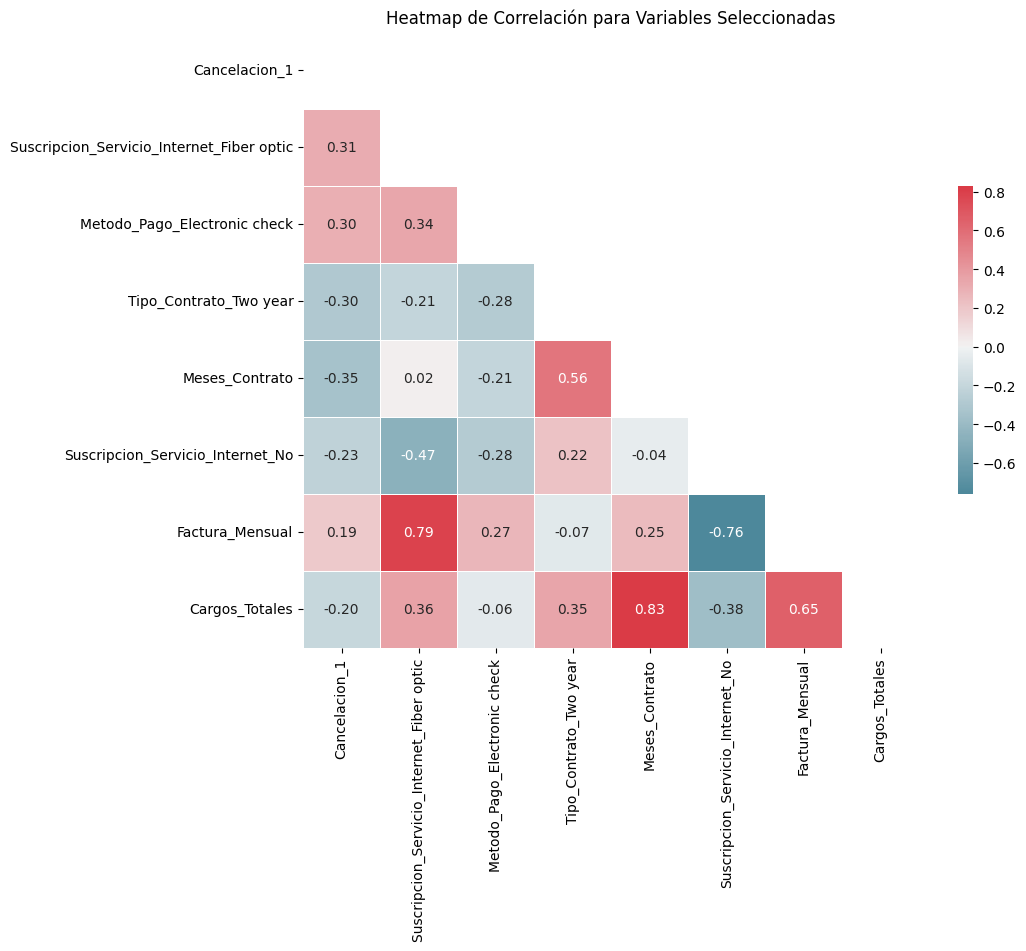

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas seleccionadas para continuar con los modelos y predicciones
columnas_seleccionadas = [
    'Cancelacion_1',   #
    'Suscripcion_Servicio_Internet_Fiber optic',
    'Metodo_Pago_Electronic check',
    'Tipo_Contrato_Two year',
    'Meses_Contrato',
    'Suscripcion_Servicio_Internet_No',
    'Factura_Mensual',
    'Cargos_Totales'
]

# Seleccionar solo las columnas deseadas del DataFrame codificado
df_seleccionado = df_encoded[columnas_seleccionadas]

# Calcular la matriz de correlación para las columnas seleccionadas
corr_seleccionada = df_seleccionado.corr()

# Generar una máscara para el triángulo superior (opcional, para mejor visualización)
mascara = np.triu(np.ones_like(corr_seleccionada, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    np.round(corr_seleccionada, 2), # Redondear valores para mejor lectura
    annot=True,                    # Mostrar valores en las celdas
    fmt=".2f",                     # Formato de los valores (2 decimales)
    cmap=cmap,                     # Mapa de colores
    center=0,                      # Centro del mapa de colores en 0
    square=True,                   # Celdas cuadradas
    linewidths=0.5,                # Líneas entre celdas
    cbar_kws={"shrink": 0.5},      # Barra de color
    mask=mascara                   # Aplicar máscara
)

plt.title('Heatmap de Correlación para Variables Seleccionadas')
plt.show()

### ## Relacionando variables - Analisis inicial con el PairPlot de Seaborn

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

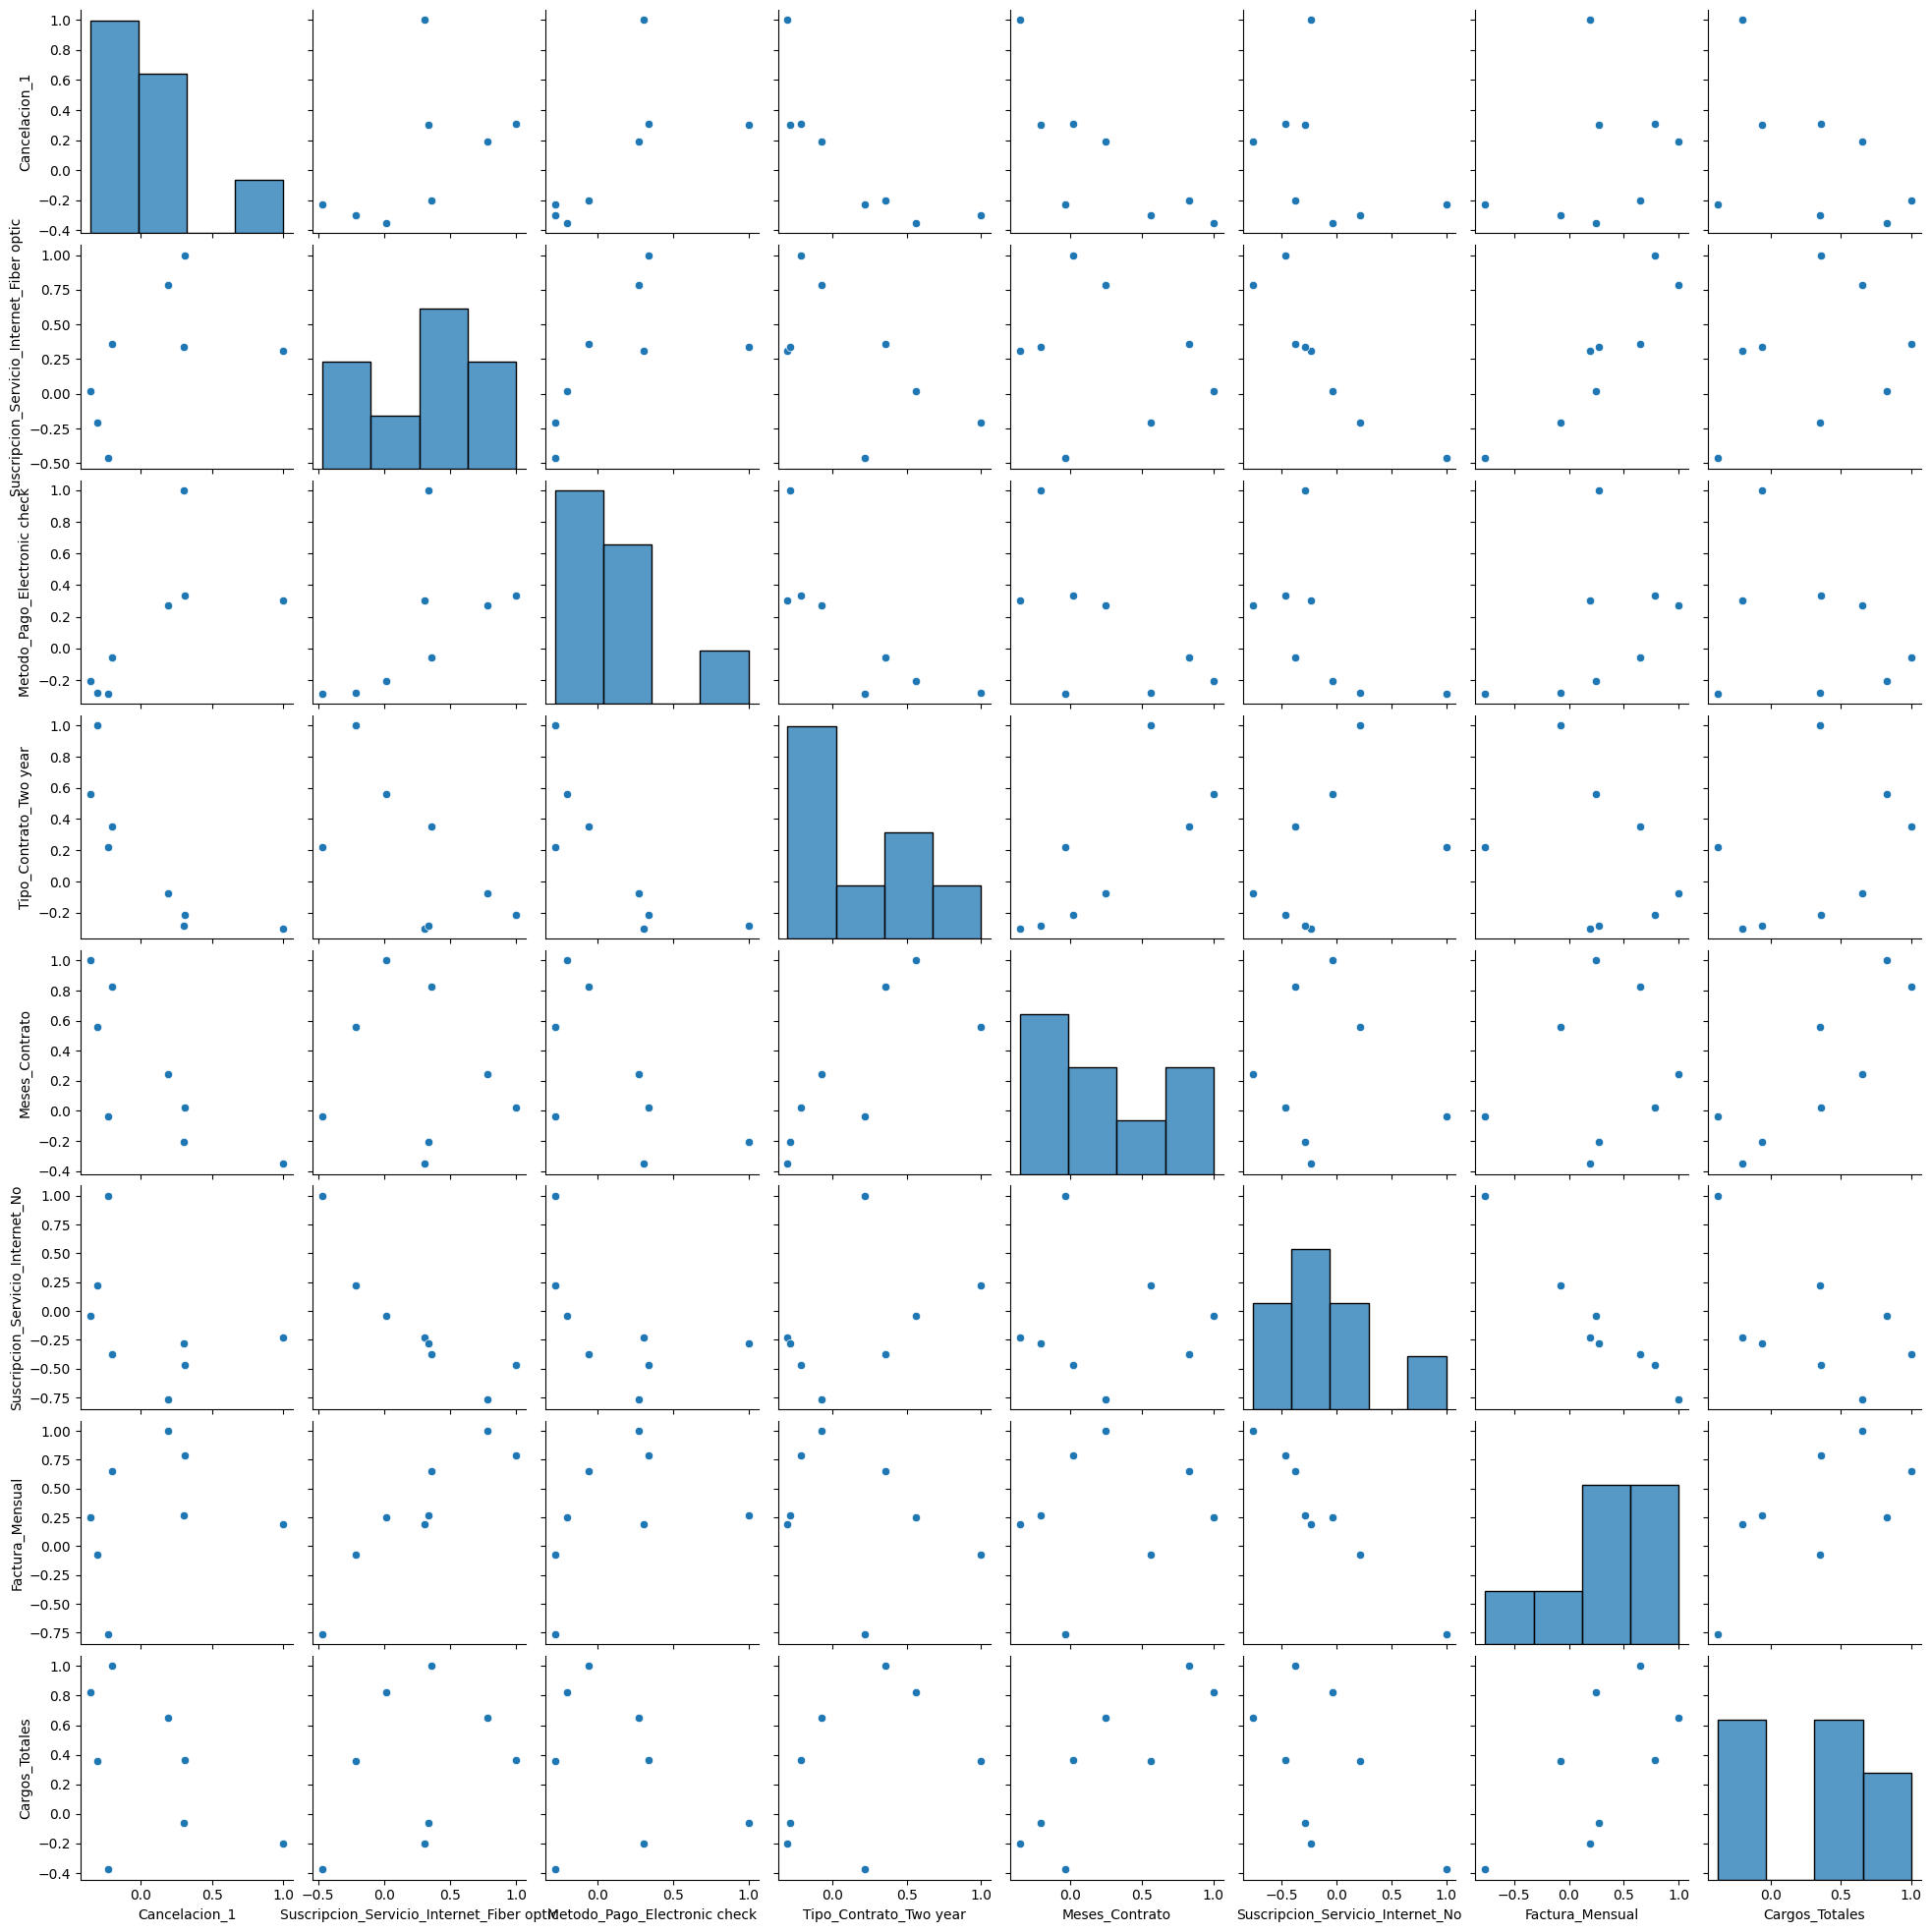

In [ ]:
sns.pairplot(corr_seleccionada)

In [ ]:
# importando los paquetes - bibliotecas para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-4121548696.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['Cancelacion_1'],kde=True,color='green')


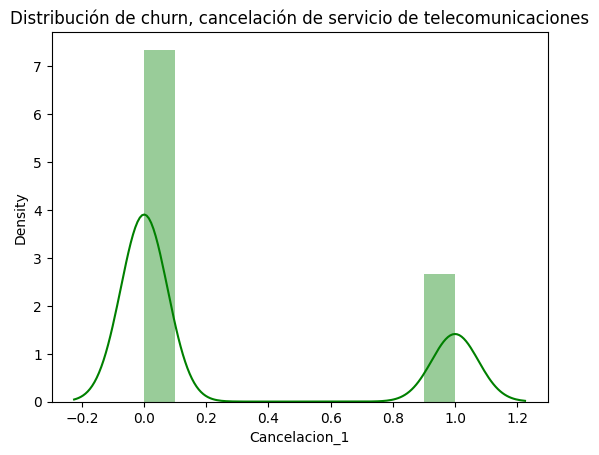

In [ ]:
#Quién es nuestra variable de respuesta? Cancelacion_1 = Churn_Yes
sns.distplot(df_encoded['Cancelacion_1'],kde=True,color='green')
plt.title('Distribución de churn, cancelación de servicio de telecomunicaciones')
plt.show()

El histograma confirma visualmente que el conjunto de datos está desbalanceado en cuanto a la variable objetivo Cancelacion_1. La clase mayoritaria son los clientes que no cancelaron, y la clase minoritaria son los clientes que sí cancelaron.

Este desbalance es importante porque puede afectar el rendimiento de algunos modelos de clasificación, haciendo que tiendan a predecir la clase mayoritaria con más frecuencia. Por eso, pasos posteriores como el uso de técnicas de balanceo (SMOTE o Undersampling) son necesarios para entrenar modelos que puedan identificar mejor la clase minoritaria (los clientes que cancelan), que es la que nos interesa predecir para la estrategia de retención.

En resumen, el histograma sirve como una confirmación visual clara del desbalance en tu variable objetivo.

## 🔍 Análisis de Multicolinealidad (VIF)

La **multicolinealidad** se refiere a la situación donde dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí. Esto significa que existe una relación lineal fuerte entre estas variables, lo que puede dificultar la interpretación correcta de los efectos individuales de cada variable sobre la variable dependiente.

Para detectar la presencia de multicolinealidad entre variables independientes, utilizamos el **Factor de Inflación de la Varianza (VIF)**. El VIF mide cuánto aumenta la varianza del coeficiente de regresión de una variable predictora debido a su correlación con otras variables predictoras en el modelo.

La interpretación general del VIF es la siguiente:

*   **VIF = 1**: No hay multicolinealidad para esta variable.
*   **1 < VIF < 5**: Baja multicolinealidad (generalmente aceptable).
*   **5 ≤ VIF < 10**: Multicolinealidad moderada (requiere vigilancia).
*   **VIF ≥ 10**: Alta multicolinealidad (puede ser problemática y se debe considerar la eliminación de la variable).

✅ **¿Cuándo es válido calcular el VIF?**

Puedes (y debes) calcular el VIF si:

1. **Vas a usar modelos lineales** (ej.: regresión logística, regresión lineal)
2. **Quieres interpretar los coeficientes** con claridad (la multicolinealidad distorsiona signos y magnitudes)
3. **Quieres garantizar estabilidad en el modelo**

---

❌ ¿Cuándo puedes saltarte el VIF (o postergarlo)?

* Si vas a usar **modelos no lineales**, como:

  * Árboles de decisión
  * Random Forest
  * XGBoost
  * Redes neuronales

* Estos modelos **no son sensibles a la multicolinealidad**.

---

✅ Conclusión final

| Pregunta                                           | Respuesta                                             |
| -------------------------------------------------- | ----------------------------------------------------- |
| ¿El nuevo heatmap muestra multicolinealidad grave? | **No**                                                |
| ¿Necesito calcular el VIF obligatoriamente?        | **No, pero es recomendable si usas modelos lineales** |
| ¿Vale la pena como verificación extra?             | **Sí, especialmente si el modelo es interpretativo**  |

---

Generar código para calcular el VIF para todas las variables predictoras en df_encoded.

1. Importar las bibliotecas necesarias

In [ ]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # este paquete nos permie ver si hay multicolineaaridad

#from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [ ]:
# No se incluye la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Cancelacion_1'])

3. Añadir constante (intercepto)

In [ ]:
X_const = add_constant(X)

In [ ]:
X_const.columns

Index(['const', 'Meses_Contrato', 'Factura_Mensual', 'Cargos_Totales',
       'Cuentas_diarias', 'Numero_Servicios', 'Genero_Male',
       'Suscripcion_Servicio_Internet_Fiber optic',
       'Suscripcion_Servicio_Internet_No', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)',
       'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check',
       'Adulto_Mayor_1', 'Tiene_Pareja_1', 'Tiene_Dependientes_1',
       'Suscripcion_Servicio_Telefono_1', 'Suscripcion_Multiples_Lineas_0',
       'Suscripcion_Multiples_Lineas_1', 'Suscripcion_Seguridad_En_Linea_1',
       'Suscripcion_Respaldo_En_Linea_1',
       'Suscripcion_Proteccion_Dispositivo_1', 'Suscripcion_Soporte_Técnico_1',
       'Suscripcion_TV_Streaming_1', 'Suscripcion_Películas_Streaming_1',
       'Factura_Electronica_1'],
      dtype='object')

4. Calcular el VIF

In [ ]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns # explicativas_1
vif_data["VIF"] = [vif(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,Numero_Servicios,inf
18,Suscripcion_Multiples_Lineas_0,inf
25,Suscripcion_Películas_Streaming_1,inf
19,Suscripcion_Multiples_Lineas_1,inf
20,Suscripcion_Seguridad_En_Linea_1,inf
21,Suscripcion_Respaldo_En_Linea_1,inf
22,Suscripcion_Proteccion_Dispositivo_1,inf
23,Suscripcion_Soporte_Técnico_1,inf
24,Suscripcion_TV_Streaming_1,inf
17,Suscripcion_Servicio_Telefono_1,inf


### ✅ Resultados del VIF Inicial y Alertas de Multicolinealidad

El análisis del Factor de Inflación de la Varianza (VIF) nos ayuda a cuantificar la severidad de la multicolinealidad entre las variables predictoras. Un VIF alto para una variable indica que esa variable está altamente correlacionada con otras variables en el modelo, lo que puede dificultar la interpretación de los coeficientes y afectar la estabilidad del modelo, especialmente en modelos lineales como la Regresión Logística.

✅ **Interpretación General del VIF:**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

Multicolinealidad perfecta, indica que una variable es una combinación lineal exacta de otras variables en el modelo

---



🔍 **Resultados del VIF Inicial:**

El cálculo inicial del VIF para las variables predictoras (`X_const`) reveló la presencia de multicolinealidad significativa, incluyendo casos de multicolinealidad perfecta. A continuación, se destacan las variables con VIF alto o infinito:

| Variable                                    | VIF       | Causa/Explicación Potencial                                                                                                                               | Soluciones Sugeridas                                                                                                                                                                   |
| :------------------------------------------ | :-------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `Numero_Servicios`                          | `inf`     | Multicolinealidad perfecta. Esta variable probablemente es una suma o combinación exacta de otras variables de suscripción de servicios.                      | Eliminar `Numero_Servicios` o identificar y eliminar la redundancia que la causa.                                                                                                      |
| `Suscripcion_Multiples_Lineas_0`            | `inf`     | Multicolinealidad perfecta, probablemente relacionada con `Suscripcion_Servicio_Telefono_1`. Si un cliente no tiene servicio de teléfono (`Suscripcion_Servicio_Telefono_1` es 0), entonces no puede tener múltiples líneas (`Suscripcion_Multiples_Lineas_0` es 1). | Eliminar una de las variables redundantes, como `Suscripcion_Multiples_Lineas_0` o `Suscripcion_Servicio_Telefono_1`. Considerar usar `drop_first=True` durante el one-hot encoding. |
| `Suscripcion_Películas_Streaming_1`         | `inf`     | Multicolinealidad perfecta, posiblemente relacionada con la ausencia de servicio de internet. Si no hay servicio de internet, no puede haber streaming de películas. | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Multiples_Lineas_1`            | `inf`     | Similar a `Suscripcion_Multiples_Lineas_0`, relacionada con la perfecta colinealidad con la ausencia de servicio de teléfono.                               | Eliminar una de las variables redundantes. Considerar usar `drop_first=True` durante el one-hot encoding.                                                                              |
| `Suscripcion_Seguridad_En_Linea_1`          | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Respaldo_En_Linea_1`           | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Proteccion_Dispositivo_1`      | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Soporte_Técnico_1`             | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_TV_Streaming_1`                | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Servicio_Telefono_1`           | `inf`     | Multicolinealidad perfecta, relacionada con `Suscripcion_Multiples_Lineas_0` y/o la ausencia de servicio de teléfono.                                     | Eliminar una de las variables redundantes. Considerar usar `drop_first=True` durante el one-hot encoding.                                                                              |
| `Factura_Mensual`                           | ~2064     | Alta multicolinealidad. Probablemente altamente correlacionada con `Cargos_Totales` y `Meses_Contrato` (ya que Total = Mensual \* Meses).                   | Considerar eliminar `Factura_Mensual` o `Cargos_Totales`, o crear una nueva variable que combine esta información (si es apropiado).                                               |
| `Cuentas_diarias`                           | ~1153     | Alta multicolinealidad. Al igual que `Factura_Mensual`, probablemente altamente correlacionada con `Cargos_Totales` y `Meses_Contrato`, o es un cálculo derivado similar. | Considerar eliminar `Cuentas_diarias`.                                                                                                                                                 |
| `Suscripcion_Servicio_Internet_Fiber optic` | ~148      | Alta multicolinealidad. Altamente correlacionada con `Suscripcion_Servicio_Internet_No`.                                                                  | Eliminar una de las variables de servicio de internet o asegurar que el one-hot encoding se realizó correctamente (usando `drop_first=True`).                                        |
| `Suscripcion_Servicio_Internet_No`          | ~104      | Alta multicolinealidad. Altamente correlacionada con `Suscripcion_Servicio_Internet_Fiber optic`.                                                         | Eliminar una de las variables de servicio de internet o asegurar que el one-hot encoding se realizó correctamente (usando `drop_first=True`).                                        |
| `Cargos_Totales`                            | ~10.8     | Multicolinealidad alta. Correlacionada con `Factura_Mensual` y `Meses_Contrato`.                                                                          | Considerar eliminar `Cargos_Totales` o `Factura_Mensual`.                                                                                                                            |
| `Meses_Contrato`                            | ~7.5      | Multicolinealidad moderada a alta. Correlacionada con `Cargos_Totales` y `Factura_Mensual`.                                                               | Aunque el VIF es más bajo, su relación con las otras variables de cargos es notable.                                                                                                   |

La presencia de VIFs infinitos indica la necesidad inmediata de abordar la multicolinealidad perfecta, generalmente eliminando la variable o variables redundantes. Las variables con VIFs muy altos (como `Factura_Mensual`, `Cuentas_diarias`, y las relacionadas con el servicio de internet) también deben ser examinadas y, si es necesario, eliminadas para mejorar la estabilidad del modelo y la interpretabilidad de los coeficientes en modelos lineales.

### ✅  Aplicar soluciones para abordar la multicolinealidad
 Eliminar variables con VIF infinito debido a multicolinealidad perfecta
 Basado en los resultados del VIF y el sentido común sobre los datos:

    - 'Numero_Servicios' es probablemente la suma de otras variables de servicio.
    - Variables como 'Suscripcion_Multiples_Lineas_0' y 'Suscripcion_Servicio_Telefono_1' están perfectamente correlacionadas.
    - Variables como 'Suscripcion_Películas_Streaming_1' y otras relacionadas con servicios de internet podrían estar perfectamente correlacionadas con la ausencia de servicio de internet.
    - Las variables dummy redundantes del one-hot encoding sin drop_first=True también causan multicolinealidad perfecta.

 Volvamos a examinar las columnas y sus valores únicos para confirmar redundancias.
 Ya hicimos esto anteriormente, confirmando los problemas con 'Suscripcion_Multiples_Lineas' y las columnas relacionadas con el servicio de internet.

 Basado en el análisis y la práctica común, eliminaremos las siguientes variables:

    1. 'Numero_Servicios' (probablemente suma redundante)
    2. 'Suscripcion_Servicio_Telefono_1' (perfectamente correlacionada con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service')
    3. 'Suscripcion_Multiples_Lineas_1' (redundante con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service')
    4. 'Suscripcion_Servicio_Internet_No' (redundante con 'Suscripcion_Servicio_Internet_Fiber optic' y la categoría implícita 'DSL' si se usa drop_first=True implícitamente)
    5. 'Cuentas_diarias' (altamente correlacionada con 'Factura_Mensual' y 'Cargos_Totales')
    6. 'Cargos_Totales' (altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato')


 Crear un nuevo DataFrame X_filtered eliminando las columnas identificadas de X_const

### ✅ Resultados del VIF Final y Conclusión Práctica

Después de identificar y eliminar las variables que presentaban multicolinealidad perfecta (VIF = ∞) y aquellas con VIF extremadamente alto debido a redundancias o fuertes correlaciones esperadas (`Numero_Servicios`, `Suscripcion_Servicio_Telefono_1`, `Suscripcion_Multiples_Lineas_1`, `Suscripcion_Servicio_Internet_No`, `Cuentas_diarias`, `Cargos_Totales`), recalculamos el VIF para el conjunto de variables restantes (`X_filtered`).

**Resultados del VIF Final:**

El nuevo cálculo del VIF muestra una reducción significativa en la multicolinealidad. La mayoría de las variables ahora presentan VIFs bajos o moderados (< 5 o < 10), lo que es generalmente aceptable para muchos modelos predictivos. Sin embargo, aún observamos algunas variables con VIF por encima del umbral de 10:

| Variable                                    | VIF     | Observaciones Post-Filtrado                                                                 |
| :------------------------------------------ | ------- | ------------------------------------------------------------------------------------------- |
| `const`                                     | ~18.07  | VIF para la constante. Es común que la constante tenga un VIF alto, y generalmente **se puede ignorar** en el análisis de multicolinealidad entre variables predictoras. |
| `Factura_Mensual`                           | ~14.27  | A pesar de eliminar `Cargos_Totales` y `Cuentas_diarias`, `Factura_Mensual` aún presenta un VIF por encima de 10. Esto sugiere que todavía está correlacionada con `Meses_Contrato` y/o otras variables de una manera que infla su varianza. |
| `Suscripcion_Servicio_Internet_Fiber optic` | ~6.51   | Su VIF se redujo significativamente pero aún está en el rango moderado a alto. Esto indica que todavía hay cierta correlación con otras variables, probablemente relacionadas con los servicios de internet o el tipo de contrato. |
| `Meses_Contrato`                            | ~2.73   | Su VIF se redujo a un nivel aceptable, lo que confirma que la eliminación de `Cargos_Totales` y `Factura_Mensual` ayudó a mitigar su multicolinealidad. |
| Resto de Variables                          | < 2.5   | La mayoría de las demás variables tienen VIFs bajos, indicando poca o ninguna multicolinealidad con las variables restantes. |

**Análisis y Conclusión Práctica:**

1.  **Éxito en la Eliminación de Multicolinealidad Perfecta:** Logramos eliminar las fuentes de multicolinealidad perfecta (VIF = ∞) al remover variables redundantes y sumas. Esto es crucial para la estabilidad de cualquier modelo lineal.
2.  **Reducción General del VIF:** La mayoría de las variables predictoras ahora tienen VIFs aceptables para el modelado.
3.  **Problema Persistente con `Factura_Mensual`:** La variable `Factura_Mensual` aún muestra un VIF relativamente alto (~14.27). Aunque no es multicolinealidad perfecta, puede seguir afectando la interpretabilidad precisa de su coeficiente en un modelo de regresión lineal. Sin embargo, para algoritmos que no son sensibles a la multicolinealidad (como Random Forest o modelos basados en árboles), este nivel de VIF no será un problema. Si se planea usar Regresión Logística y la interpretabilidad del coeficiente de `Factura_Mensual` es crítica, se podría considerar una transformación o, en última instancia, su eliminación, aunque esto implicaría perder información potencialmente valiosa.
4.  **`Suscripcion_Servicio_Internet_Fiber optic` en el Límite:** Su VIF (~6.51) está en el rango moderado/alto, pero generalmente es manejable y no suele requerir eliminación a menos que cause problemas específicos en el modelo.

**Decisión Final:**

Dado que el objetivo es preparar los datos para entrenar *dos o más modelos de clasificación* (que podrían incluir modelos no lineales), y que la multicolinealidad perfecta ha sido resuelta, el conjunto de datos `X_filtered` está ahora en una condición mucho mejor.

Si bien `Factura_Mensual` aún tiene un VIF elevado, su impacto puede ser menos crítico para modelos no lineales. Para modelos lineales como la Regresión Logística, debemos ser conscientes de que el coeficiente de `Factura_Mensual` puede ser menos fiable para la interpretación directa.

Por ahora, procederemos con `X_filtered` como el conjunto de variables predictoras para el entrenamiento del modelo, aceptando el VIF restante en `Factura_Mensual`, ya que su eliminación podría impactar negativamente el poder predictivo general. Si durante la evaluación del modelo lineal se observan problemas (por ejemplo, coeficientes inesperados o inestabilidad), se podría reconsiderar la eliminación de `Factura_Mensual`.

**VIF REHECHO**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variables con multicolinearidad perfecta (VIF = inf) ======
cols_to_drop = [
    "Numero_Servicios",                              # Suma redundante servicios
    "Suscripcion_Servicio_Telefono_1",               # Perfectamente correlacionada con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
    "Suscripcion_Multiples_Lineas_1"                 # Redundante con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundancias fuertes entre variables numéricas ======
X_filtered.drop(columns=["Cuentas_diarias"], inplace=True)    # Altamente correlacionada con 'Factura_Mensual' y 'Cargos_Totales'
X_filtered.drop(columns=["Cargos_Totales"], inplace=True)     # Altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato'

# ====== Etapa 4: Remover redundancia entre dummies de la misma variable categórica ======
# Si se uso get_dummies sin drop_first, se tendran dummies redundantes para InternetService
X_filtered.drop(columns=["Suscripcion_Servicio_Internet_No"], inplace=True)  # Redundante con 'Suscripcion_Servicio_Internet_Fiber optic' y la categoría implícita 'DSL' si se usa drop_first=True implícitamente

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [vif(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,18.068664
2,Factura_Mensual,14.269089
4,Suscripcion_Servicio_Internet_Fiber optic,6.509136
1,Meses_Contrato,2.731356
6,Tipo_Contrato_Two year,2.497090
19,Suscripcion_Películas_Streaming_1,2.088289
18,Suscripcion_TV_Streaming_1,2.086073
8,Metodo_Pago_Electronic check,1.965646
9,Metodo_Pago_Mailed check,1.830530
17,Suscripcion_Soporte_Técnico_1,1.642923


✅ Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |

---

✅ 🔍 Puntos importantes en tu resultado:

| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `Factura_Mensual` | 14.26   | Aún con multicolinealidad alta — puede estar correlacionada con `Charges.Total`. |
| `const`                   | 18.06   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–6.5 | Todos con VIF **aceptable u óptimo** ✔️                                                     |

---

✅ Conclusión práctica

* ✅ **La multicolinealidad crítica fue resuelta** (sin `inf`, sin redundancia perfecta)
* ⚠️ **Solo `Factura_Mensual` siguen colineales entre sí** — esto ya era esperado

---

El campo de Cargos Totales, es igual al valor de Cuentas_diarias * Factura_MEnsual, ya se eliminaron las dos variavles de la operacion, se dejo Factura_Mensual para tener una representativa. Continuamos